## ЗАДАНИЕ 1 ##

Выполнение бюджета по выдачам необеспеченных потребительских кредитов4 немного отстает от плана. Нам нужно понять, что является причиной отставания, чтобы оперативно исправить ситуацию.
В связи с этим тебе необходимо:

● Провести анализ количества и уровня одобрения по поступающим заявлениям на кредит.

● Определить, какой из этих показателей и в каких сегментах (по типу клиента и программе кредитования) мог привести к снижению объемов выдач.

● Дать комментарии к полученным результатам.



In [1]:
## импортируем необходимые библиотеки для анализа данных

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## загружаем данные для анализа

In [3]:
df = pd.read_excel('Заявки.xlsx')

In [4]:
## Просмотр данных 

In [5]:
df.head()

,Идентификатор заявления,Программа кредитования,Тип клиента,Дата заявки,Флаг одобрения
0,X-6BX3JFA,Standard,Существующий клиент,201901,0
1,X-6BJQ0PR,Standard,Существующий клиент,201901,0
2,X-6C63S2W,Standard,Существующий клиент,201901,0
3,X-6C6LLYC,Standard,Существующий клиент,201901,0
4,X-6CDURAK,Standard,Существующий клиент,201901,0


In [6]:
df.info()
 ## Общая информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166183 entries, 0 to 166182
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Идентификатор заявления  166183 non-null  object
 1   Программа кредитования   166183 non-null  object
 2   Тип клиента              166183 non-null  object
 3   Дата заявки              166183 non-null  int64 
 4   Флаг одобрения           166183 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 6.3+ MB


In [7]:
df.shape
## Размерность данных. В нашем файле 5 столбцов и 166183 строчки.

(166183, 5)

In [8]:
## Уникальные программы кредитования. В нашем случае будут анализироваться только 2 кредитные программы.
df['Программа кредитования'].unique()


array(['Standard', 'X-sell'], dtype=object)

In [132]:
## Общее количество заявлений по программам кредитования
df['Программа кредитования'].value_counts()

X-sell      114603
Standard     51580
Name: Программа кредитования, dtype: int64

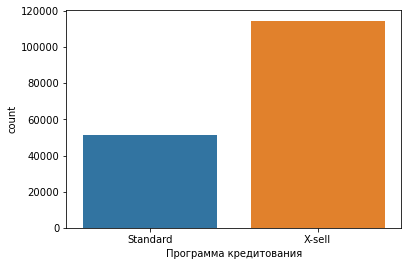

In [11]:
sns.countplot(x = df['Программа кредитования'])
plt.xlabel = 'Программа креди тования'
plt.ylabel = 'Количество заемщиков'

In [12]:
## Посмотрим какие типы клиентов обслуживает банк
df['Тип клиента'].unique()

array(['Существующий клиент', 'Зарплатный клиент', 'Сотрудник Банка',
       'Сторонний клиент'], dtype=object)

In [13]:
# Количество заявлений по типам клиентов 
df['Тип клиента'].value_counts()

Сторонний клиент       69475
Существующий клиент    65414
Зарплатный клиент      28296
Сотрудник Банка         2998
Name: Тип клиента, dtype: int64

In [14]:
## В нашем случае есть 4 группы клиентов банка

In [15]:
## Посмотрим на количество одобренных и неодобренных заявок на кредит
df['Флаг одобрения'].value_counts()


0    104459
1     61724
Name: Флаг одобрения, dtype: int64

In [122]:
# Посмотрим на распределение количества одобренных и неодобренных заявялений в разрезе по программам кредатования

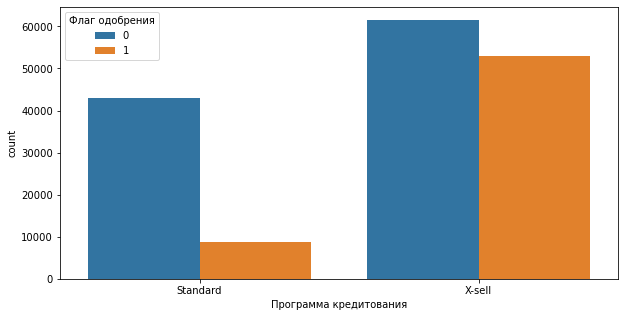

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(x='Программа кредитования', hue='Флаг одобрения', data= df)
plt.show()



## Вывод: Больше одобренных заявлений на кредит по программе X-sell

In [128]:
# Посмотрим на распределение количества одобренных и неодобренных заявялений в разрезе по типам клиентов

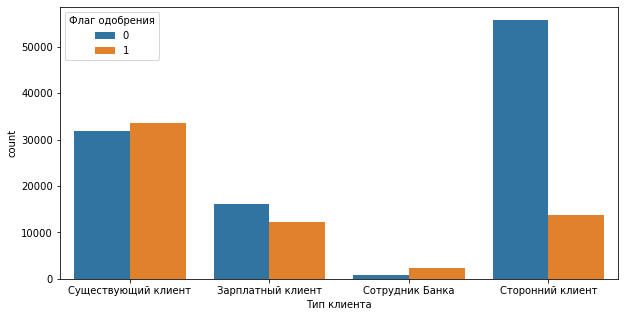

In [130]:
plt.figure(figsize=(10,5))
sns.countplot(x='Тип клиента', hue='Флаг одобрения', data= df)
plt.show()

## Вывод: Кредит чаще всего одобряют существующим клиентам банка и зарплатным клиентам. Чаще отказ в одобрении получают клиенты стороннего банка.

In [ ]:
# Посмотрим на распределение количества заявялений  по типам клиентов  по разным программам кредитования

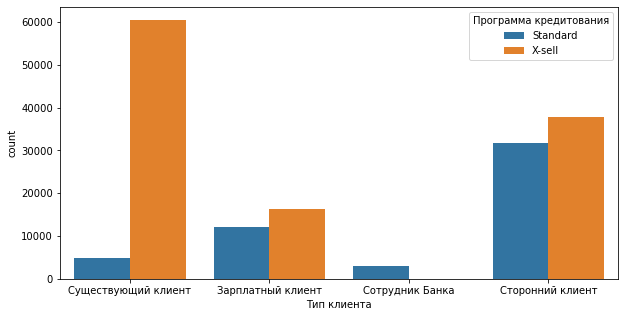

In [181]:
plt.figure(figsize=(10,5))
sns.countplot(x='Тип клиента', hue='Программа кредитования', data= df)
plt.show()

## Вывод: По данному распеределию видно, что среди клиентов банка преобладает программа X-sell

In [50]:
# Рассмотрим  распределение общего количества завялений 
df_1 = df.groupby(df['Дата заявки']).agg({'Идентификатор заявления':'count'}).reset_index()
df_2 = df.groupby(df['Дата заявки']).agg({'Флаг одобрения':'count'}).reset_index()

In [134]:
df_1.head(10)

,Дата заявки,Идентификатор заявления
0,201901,10316
1,201902,12014
2,201903,14254
3,201904,15956
4,201905,12684
5,201906,13063
6,201907,14760
7,201908,15978
8,201909,14493
9,201910,14448


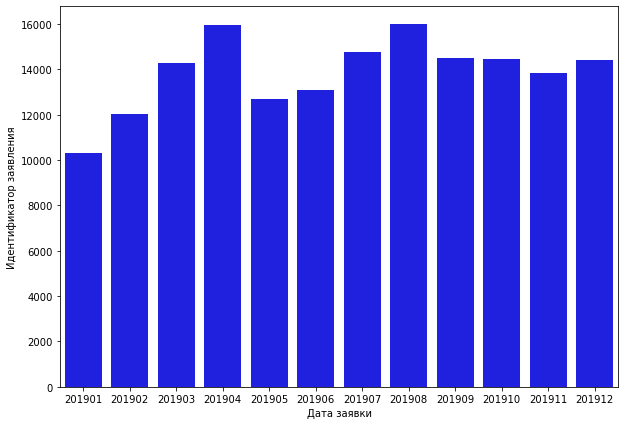

In [86]:
plt.figure(figsize=(10,7))
sns.barplot(x='Дата заявки', y='Идентификатор заявления', data=df_1,color='blue')
plt.xlabel = 'Дата заявки'
plt.ylabel = 'Количество заявок'



## Вывод: Общее количество заявлений в целом не изменилось и составляет порядка 14 тыс в месяц

In [136]:
# Посмотрим на общее число заявлений, число одобренных и высчитаем процент одобрения заявок на кредит
df_3 = df.groupby(df['Дата заявки'])\
.aggregate({'Идентификатор заявления':'count','Флаг одобрения':'sum'}).reset_index()

In [75]:
df_3['Процент одобрения']=df_3['Флаг одобрения']/ df_3['Идентификатор заявления']*100

In [81]:
df_3

,Дата заявки,Идентификатор заявления,Флаг одобрения,Процент,Процент одобрения
0,201901,10316,4107,39.811943,39.811943
1,201902,12014,4844,40.319627,40.319627
2,201903,14254,5800,40.690333,40.690333
3,201904,15956,6470,40.549010,40.549010
4,201905,12684,5500,43.361716,43.361716
5,201906,13063,4990,38.199495,38.199495
6,201907,14760,4873,33.014905,33.014905
7,201908,15978,6209,38.859682,38.859682
8,201909,14493,4828,33.312634,33.312634
9,201910,14448,4795,33.187984,33.187984


## Вывод : Процент одобрения кредита в целом снизился с 40 % в первой половине года  до 33% во второй половине года

In [137]:
# Рассмотрим распределение заявок на кредит по разным клиентам
df_4= df.groupby(['Дата заявки', 'Тип клиента'])\
.agg({'Идентификатор заявления':'count'}).reset_index()

In [104]:
df_4.head()

,Дата заявки,Тип клиента,Идентификатор заявления
0,201901,Зарплатный клиент,1748
1,201901,Сотрудник Банка,168
2,201901,Сторонний клиент,4864
3,201901,Существующий клиент,3536
4,201902,Зарплатный клиент,2012


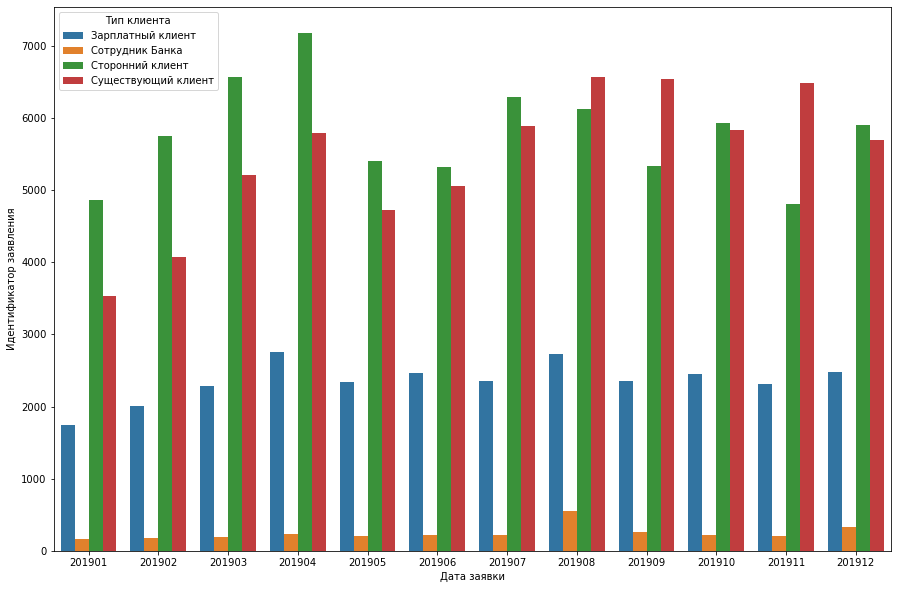

In [110]:
plt.figure(figsize=(15,10))
sns.barplot(x='Дата заявки', y='Идентификатор заявления', data= df_4, hue='Тип клиента')
plt.ylabel = 'Количество завялений'
plt.show()


## Вывод :В целом общеее количество заявлений по типам клиентов не изменилось

In [138]:
# Рассмотрим распределение заявок на кредит по разным программам кредитования
df_5= df.groupby(['Дата заявки', 'Программа кредитования'])\
.agg({'Идентификатор заявления':'count'}).reset_index()

In [113]:
df_5.head()

,Дата заявки,Программа кредитования,Идентификатор заявления
0,201901,Standard,3666
1,201901,X-sell,6650
2,201902,Standard,4226
3,201902,X-sell,7788
4,201903,Standard,4755


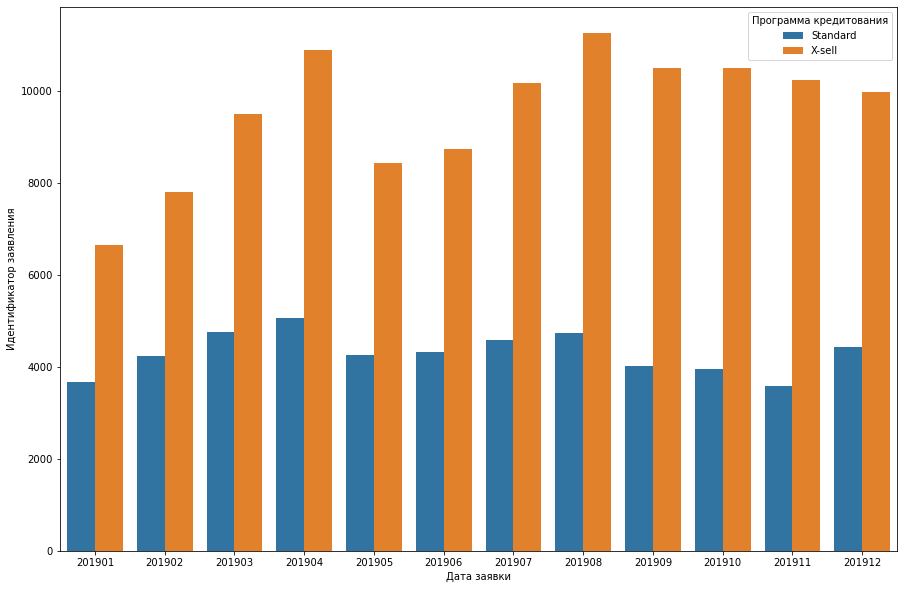

In [114]:
plt.figure(figsize=(15,10))
sns.barplot(x='Дата заявки', y='Идентификатор заявления', data= df_5, hue='Программа кредитования')
plt.ylabel = 'Количество завялений'
plt.show()

### Вывод: В целом общеее количество заявлений по разным программам кредитования не изменилось

In [118]:
# Рассмотрим  распределение процента одобрения кредита по программа кредитования
df_6 = df.groupby(['Дата заявки', 'Программа кредитования'])\
.aggregate({'Идентификатор заявления':'count','Флаг одобрения':'sum'}).reset_index()

In [139]:
df_6['Процент одобрения'] = df_6['Флаг одобрения']/df_6['Идентификатор заявления']* 100

In [140]:
df_6.head(10)

,Дата заявки,Программа кредитования,Идентификатор заявления,Флаг одобрения,Процент одобрения
0,201901,Standard,3666,625,17.048554
1,201901,X-sell,6650,3482,52.360902
2,201902,Standard,4226,639,15.120681
3,201902,X-sell,7788,4205,53.993323
4,201903,Standard,4755,738,15.520505
5,201903,X-sell,9499,5062,53.289820
6,201904,Standard,5068,868,17.127072
7,201904,X-sell,10888,5602,51.451139
8,201905,Standard,4248,876,20.621469
9,201905,X-sell,8436,4624,54.812707


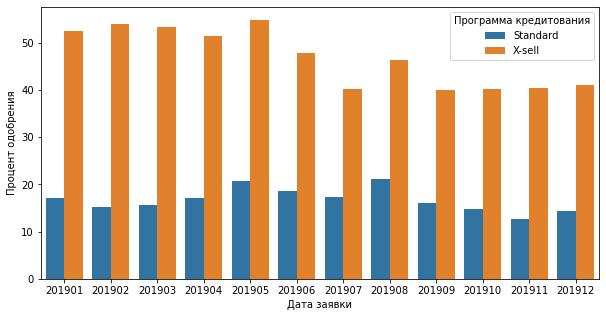

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(x='Дата заявки',y='Процент одобрения',data=df_6, hue='Программа кредитования')
plt.show()

## Вывод: Процент одобрения заявок по программе X-sell снизился существенно  с 60 до 40 % 

In [145]:
# Рассмотрим как изменился % одобрения по существующим клиентам по разным программам кредитования

In [164]:
df_7 = df.groupby(['Дата заявки', 'Тип клиента','Программа кредитования'])\
.aggregate({'Идентификатор заявления':'count','Флаг одобрения':'sum'}).reset_index()

In [165]:
df_7['Процент одобрения']=df_7['Флаг одобрения']/df_7['Идентификатор заявления']* 100

In [166]:
df_klient = df_7[df_7['Тип клиента']=='Существующий клиент']

In [169]:
df_klient.head()

,Дата заявки,Тип клиента,Программа кредитования,Идентификатор заявления,Флаг одобрения,Процент одобрения
5,201901,Существующий клиент,Standard,370,42,11.351351
6,201901,Существующий клиент,X-sell,3166,2008,63.423879
12,201902,Существующий клиент,Standard,431,72,16.705336
13,201902,Существующий клиент,X-sell,3639,2493,68.507832
19,201903,Существующий клиент,Standard,438,69,15.753425


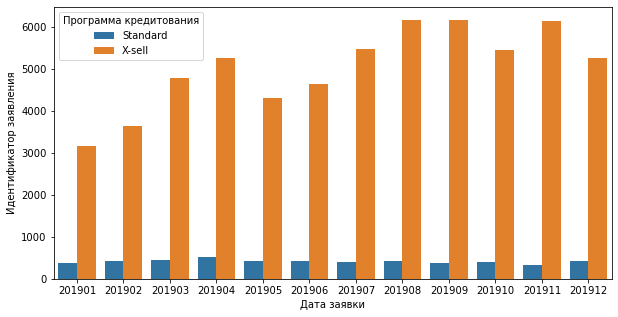

In [174]:
plt.figure(figsize=(10,5))
sns.barplot(x='Дата заявки',y='Идентификатор заявления',data=df_klient, hue='Программа кредитования')
plt.show()

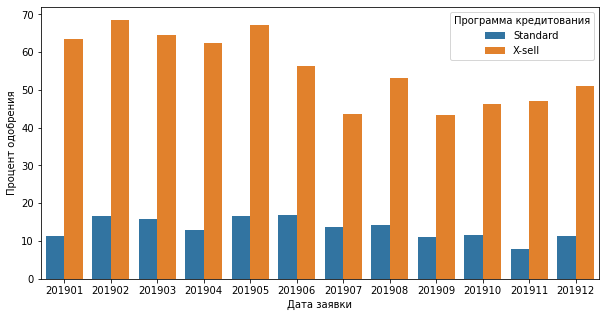

In [168]:
plt.figure(figsize=(10,5))
sns.barplot(x='Дата заявки',y='Процент одобрения',data=df_klient, hue='Программа кредитования')
plt.show()

## Вывод: По прогамме кредитования Standart по существующим клиентам банка % одобрения в целом не изменился, однако наблюдается существенное изменение с 65% до 45% по программе кредитования X-sell

In [170]:
# Рассмотрим как изменился % одобрения посторонним клиентам по разным программам кредитования

In [171]:
df_not_klient = df_7[df_7['Тип клиента']=='Сторонний клиент']

In [172]:
df_not_klient.head()

,Дата заявки,Тип клиента,Программа кредитования,Идентификатор заявления,Флаг одобрения,Процент одобрения
3,201901,Сторонний клиент,Standard,2395,125,5.219207
4,201901,Сторонний клиент,X-sell,2469,995,40.299716
10,201902,Сторонний клиент,Standard,2808,146,5.199430
11,201902,Сторонний клиент,X-sell,2943,1173,39.857288
17,201903,Сторонний клиент,Standard,3250,183,5.630769


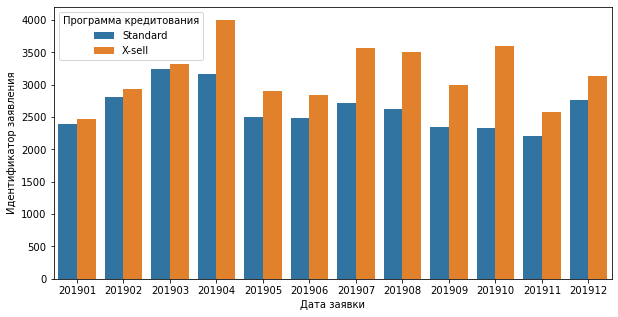

In [175]:
plt.figure(figsize=(10,5))
sns.barplot(x='Дата заявки',y='Идентификатор заявления',data=df_not_klient, hue='Программа кредитования')
plt.show()

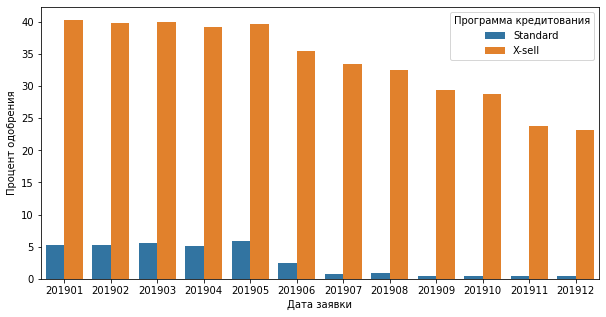

In [173]:
plt.figure(figsize=(10,5))
sns.barplot(x='Дата заявки',y='Процент одобрения',data=df_not_klient, hue='Программа кредитования')
plt.show()

## Вывод: Уровень одобрения сторонних клиентов существенно снизился как по программе Standard (с 5% до 0%), так и по программе X-sell (с 40% до 23%).